In [ ]:
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames


import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from utils.helper import fn_plot_confusion_matrix,fn_plot_tf_hist,fn


In [4]:
RANDOM_STATE=24
np.random.seed(RANDOM_STATE)
rng=np.random.default_rng(seed=RANDOM_STATE)

TEST_SIZE=0.2
EPOCHS=200
ALPHA=0.001
BATCH_SIZE=16
params={"legend.fontsi"}

WEIGHT_DECAY = 0.001
PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE=5
MIN_LR = 1e-6

## **Weather History**

In [ ]:
data_df = pd.read_csv(r'D:\dnn_input\weatherHistory.csv')
data_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [15]:
for col in data_df.columns:
    print(f"Col :{col} . {data_df[col].unique()}")

Col :Formatted Date . ['2006-04-01 00:00:00.000 +0200' '2006-04-01 01:00:00.000 +0200'
 '2006-04-01 02:00:00.000 +0200' ... '2016-09-09 21:00:00.000 +0200'
 '2016-09-09 22:00:00.000 +0200' '2016-09-09 23:00:00.000 +0200']
Col :Summary . ['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']
Col :Precip Type . ['rain' 'snow' nan]
Col :Temperature (C) . [ 9.47222222  9.35555556  9.37777778 ... 28.47222222 28.33888889
 30.60555556]
Col :Apparent Temperature (C) . [ 7.38888889  7.22777778  9.37777778 ... 12.14444444  9.73888889
  9.23333333]
Col :Humidit

In [16]:
data_df["datetime"] = pd.to_datetime(data_df["Formatted Date"],utc=True)

In [21]:
num_cols = data_df.columns

KeyboardInterrupt: 

<Figure size 20000x6000 with 0 Axes>

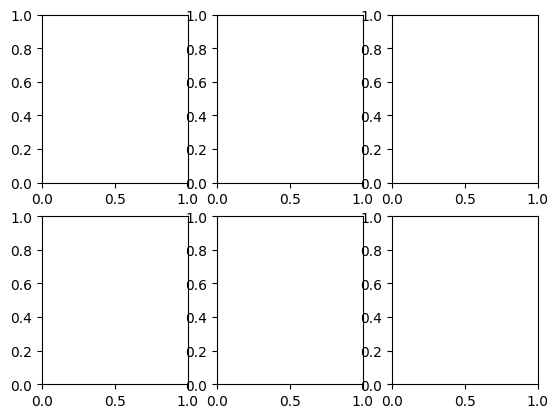

In [24]:
plt.figure(figsize=(200,60))
fig,axes = plt.subplots(2,3)

axes = axes.ravel()
for count, col in enumerate(num_cols):
    ax=axes[count]
    sns.violinplot(data=data_df,y=col,ax = ax)
plt.tight_layout()

In [25]:
tmp_df = data_df[["datetime", "Temperature (C)", 'Humidity', 'Visibility (km)' ]]
tmp_df = tmp_df.sort_values("datetime",axis=0,ascending=True)
tmp_df = tmp_df.reset_index(drop=True)
tmp_df.head()

,datetime,Temperature (C),Humidity,Visibility (km)
0,2005-12-31 23:00:00+00:00,0.577778,0.89,9.9820
1,2006-01-01 00:00:00+00:00,1.161111,0.85,9.9015
2,2006-01-01 01:00:00+00:00,1.666667,0.82,9.9015
3,2006-01-01 02:00:00+00:00,1.711111,0.82,9.9015
4,2006-01-01 03:00:00+00:00,1.183333,0.86,9.9015


In [ ]:
temp_df =temp_df.rename({"Temperature (C)" : "temp"},axis=1)
temp_df.head()

,datetime,temp
0,2005-12-31 23:00:00+00:00,0.577778
1,2006-01-01 00:00:00+00:00,1.161111
2,2006-01-01 01:00:00+00:00,1.666667
3,2006-01-01 02:00:00+00:00,1.711111
4,2006-01-01 03:00:00+00:00,1.183333


In [26]:
tmp_df.columns

Index(['datetime', 'Temperature (C)', 'Humidity', 'Visibility (km)'], dtype='object')

In [27]:
tmp_df =tmp_df.rename({"Temperature (C)" : "temp","Humidity":"hum","Visibility (km)":"viz"},axis=1)
tmp_df.head()

,datetime,temp,hum,viz
0,2005-12-31 23:00:00+00:00,0.577778,0.89,9.9820
1,2006-01-01 00:00:00+00:00,1.161111,0.85,9.9015
2,2006-01-01 01:00:00+00:00,1.666667,0.82,9.9015
3,2006-01-01 02:00:00+00:00,1.711111,0.82,9.9015
4,2006-01-01 03:00:00+00:00,1.183333,0.86,9.9015


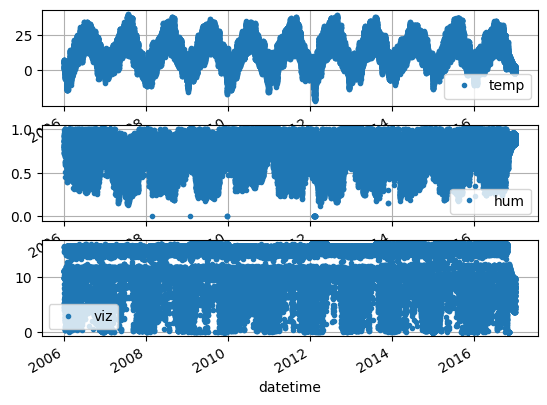

In [28]:

fig, axes=plt.subplots(3,1)
ax=axes[0]
tmp_df.plot(x="datetime",y="temp",style = ".",ax=ax)
ax.grid()

ax=axes[1]
tmp_df.plot(x="datetime",y="hum",style = ".",ax=ax)
ax.grid()

ax=axes[2]
tmp_df.plot(x="datetime",y="viz",style = ".",ax=ax)
ax.grid()

plt.show()

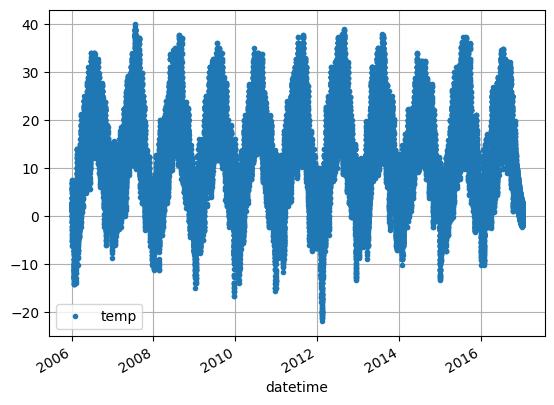

In [ ]:
fig, ax=plt.subplots()
temp_df.plot(x="datetime",y="temp",style = ".",ax=ax)
ax.grid()

In [29]:
time_step =24
y_idx = np.arange(time_step,temp_df.shape[0],time_step)
y_idx

array([   24,    48,    72, ..., 96384, 96408, 96432])

In [30]:
y_df = tmp_df.iloc[y_idx]
y_df.head()

,datetime,temp,hum,viz
24,2006-01-01 23:00:00+00:00,5.422222,0.86,15.6492
48,2006-01-02 23:00:00+00:00,1.694444,0.92,4.4919
72,2006-01-03 23:00:00+00:00,2.200000,0.89,9.5795
96,2006-01-04 23:00:00+00:00,1.666667,0.92,9.9015
120,2006-01-05 23:00:00+00:00,1.805556,0.99,2.2057


In [31]:
X_df = tmp_df.iloc[range(len(y_df) * time_step)]
X_df.shape

(96432, 4)

In [32]:
X_temp=np.reshape(X_df["temp"].to_numpy(),(len(y_df),time_step))
X_hum=np.reshape(X_df["hum"].to_numpy(),(len(y_df),time_step))
X_viz=np.reshape(X_df["viz"].to_numpy(),(len(y_df),time_step))
X_temp.shape

(4018, 24)

In [34]:
X_temp=X_temp[:,:23]
X_hum=X_hum[:,:23]
X_viz=X_viz[:,:23]
# X_temp=np.reshape(X_temp,(X_temp.shape[0],X_temp.shape[1],1))
X_temp.shape

(4018, 23)

In [35]:
X_data =np.stack((X_temp,X_hum,X_viz),axis=2)

In [36]:
split = int(y_df.shape[0]*(1-TEST_SIZE))
X_train = X_data[:split]
X_test = X_data[split:]
y_train = y_df["temp"].to_numpy()[:split]
y_test = y_df["temp"].to_numpy()[split:]
y_train.shape,y_test.shape


((3214,), (804,))

In [37]:
y_train.shape,X_test.shape

((3214,), (804, 23, 3))

## Define Model


In [39]:
optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA)
loss_fn = tf.keras.losses.MeanSquaredError()
metrics=tf.keras.metrics.RootMeanSquaredError()

model.compile(optimizer = optimizer, loss= loss_fn, metrics =[metrics])

In [38]:
h_units =512
input_shape = (time_step-1,X_train.shape[2])

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = input_shape))
model.add(tf.keras.layers.SimpleRNN(units =h_units,activation="tanh"))
model.add(tf.keras.layers.Dense(1,activation="linear"))

In [40]:
PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 5
MIN_LR = 1e-6

es_call_back =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True
)

lr_callback=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=1,
    mode="auto",
    min_lr=MIN_LR,
)


In [41]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((804, 23, 3), (804,), (3214, 23, 3), (3214,))

In [42]:
history=model.fit(X_train,y_train,validation_data=[X_test,y_test],callbacks=[es_call_back,lr_callback],batch_size= BATCH_SIZE,epochs= EPOCHS)
history

Epoch 1/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 3.7751 - root_mean_squared_error: 1.9430 - val_loss: 1.0445 - val_root_mean_squared_error: 1.0220 - learning_rate: 0.0010
Epoch 2/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.3892 - root_mean_squared_error: 1.1786 - val_loss: 0.8192 - val_root_mean_squared_error: 0.9051 - learning_rate: 0.0010
Epoch 3/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.2931 - root_mean_squared_error: 1.1372 - val_loss: 0.8120 - val_root_mean_squared_error: 0.9011 - learning_rate: 0.0010
Epoch 4/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2112 - root_mean_squared_error: 1.1005 - val_loss: 0.9930 - val_root_mean_squared_error: 0.9965 - learning_rate: 0.0010
Epoch 5/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2630 - root_mean_squared_error: 1.1238 - val_loss: 0.6943 - val_root_mean_squared_error: 0.8333 - learning_rate: 0.0010
Epoch 6/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.2902 - root_mean

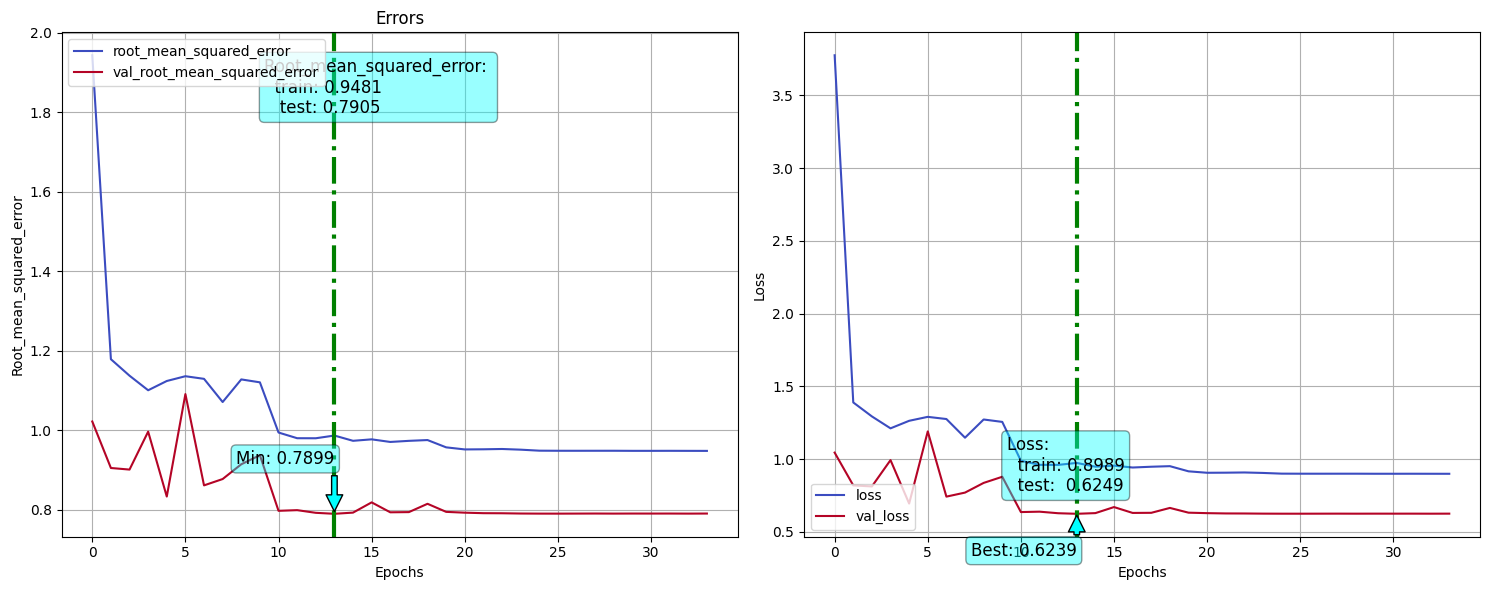

In [45]:
loss_df=pd.DataFrame(history.history)
fn_plot_tf_hist(loss_df.iloc[:,:])

In [ ]:
wax = model.get_weights()[0].shape
waa = model.get_weights()[1].shape
baa = model.get_weights()[2].shape
way = model.get_weights()[3].shape
bay = model.get_weights()[4].shape

print("Shape of Matrix")
print("Wax = ",wax," Waa",waa," Baa ",baa," Way ",way," Bay ",bay)


Shape of Matrix
Wax =  (10000, 100)  Waa (100, 100)  Baa  (100,)  Way  (100, 1)  Bay  (1,)


array([   24,    48,    72, ..., 96384, 96408, 96432])

In [ ]:
y_df = temp_df.iloc[y_idx]
y_df.head()

,datetime,temp
24,2006-01-01 23:00:00+00:00,5.422222
48,2006-01-02 23:00:00+00:00,1.694444
72,2006-01-03 23:00:00+00:00,2.200000
96,2006-01-04 23:00:00+00:00,1.666667
120,2006-01-05 23:00:00+00:00,1.805556


In [ ]:
X_df = temp_df.iloc[range(len(y_df) * time_step)]
X_df.shape

(96432, 2)

In [ ]:
X_df.reshape((len(y_df),))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
start = -2.1
end = 2.1

delta = 0.001

# Training Data
X_train = np.arange(start,end+delta,delta)
y_true = 2*np.square(X_train) + 2*np.sin(np.pi*X_train)
y_rng = np.random.rand(X_train.shape[0]) -0.5
y_train = y_true + y_rng*2

y_train.min(),y_true.max()

# Testing Data
X_test = np.arange(start,end+delta,delta*10)
y_true_test = 2*np.square(X_test) + 2*np.sin(np.pi*X_test)
y_rng = np.random.rand(X_test.shape[0]) -0.5
y_test = y_true_test + y_rng*2
y_test.min(),y_test.max()

(np.float64(-2.4796715408089343), np.float64(9.325824491056808))

In [ ]:
h_units=512
input_shape=(time_step-1,X_train.shape[2])

model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=input_shape))
model.add(tf.keras.layers.SimpleRNN(units=h_units,activation="tanh"))
model.add(tf.ker)

262.5625

In [ ]:
num_examples=262* BATCH_SIZE

X_train=X_train[:num_examples]
y_train=y_train[:num_examples]
y_true=y_true[:num_examples]

X_train.shape,y_train.shape,y_true.shape


NameError: name 'X_train' is not defined

In [ ]:
split = int(y_df.shape(0)*(1-TEST_SIZE))
X_train=X_data[:split]
X_test=X_data[split:]
y_train=y_df["temp"].to_numpy()[:split]
y_test=y_df["temp"].to_numpy()[split:]
y_train.shape,y_test.shape

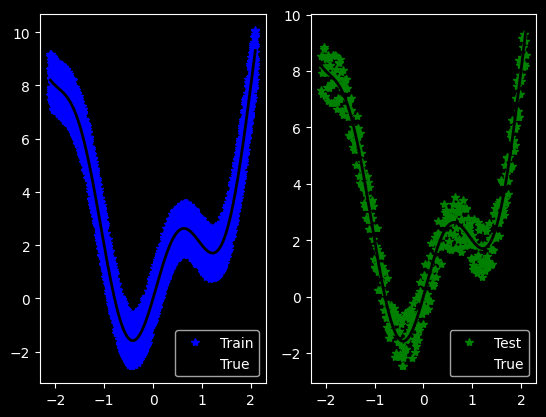

In [ ]:
fig,axes=plt.subplots(1,2)
ax=axes[0]
ax.plot(X_train,y_train,"b*", label="Train")
ax.plot(X_train,y_true,c="k",linewidth=2,label=True)
ax.legend()

ax=axes[1]
ax.plot(X_test,y_test,"g*", label="Test")
ax.plot(X_test,y_true_test,c="k",linewidth=2,label=True)
ax.legend()

## **Define model**

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))

NameError: name 'X_train' is not defined

In [ ]:
train_ds =train_ds.shuffle(buffer_size = X_train.shape[0]).batch(BATCH_SIZE)
test_ds= test_ds.shuffle(buffer_size =X_test.shape[0]).batch(BATCH_SIZE)


NameError: name 'train_ds' is not defined

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

NameError: name 'train_ds' is not defined

In [ ]:
next(iter(train_ds))

NameError: name 'train_ds' is not defined

## **Define Model**

#### Functional API

In [ ]:
num_features=1
#initializer=tf.keras.initializers.HeUniform(seed=RANDOM_STATE)
input_layer=tf.keras.Input(shape=(1,))

hidden_layer=tf.keras.layers.Dense(512,activation="relu")(input_layer)
hidden_layer=tf.keras.layers.Dense(256,activation="relu")(hidden_layer)
output_layer=tf.keras.layers.Dense(1)(hidden_layer)

model=tf.keras.Model(inputs=input_layer,outputs=output_layer)
print(model)

<Functional name=functional, built=True>


In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA)
loss_fn = tf.keras.losses.MeanSquaredError()
metrics=tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = optimizer, loss= loss_fn, metrics =[metrics])

### Callbacks

In [ ]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

es_call_back =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True
)

lr_callback=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=1,
    mode="auto",
    min_lr=MIN_LR,
)


In [ ]:
history=model.fit(train_ds, validation_data=test_ds,callbacks=[es_call_back,lr_callback],epochs= EPOCHS)
history

Epoch 1/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.5744 - mean_absolute_error: 1.1832 - val_loss: 1.1899 - val_mean_absolute_error: 0.8591 - learning_rate: 0.0010
Epoch 2/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0051 - mean_absolute_error: 0.7854 - val_loss: 0.8062 - val_mean_absolute_error: 0.7387 - learning_rate: 0.0010
Epoch 3/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6483 - mean_absolute_error: 0.6505 - val_loss: 0.5388 - val_mean_absolute_error: 0.6095 - learning_rate: 0.0010
Epoch 4/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4626 - mean_absolute_error: 0.5636 - val_loss: 0.4614 - val_mean_absolute_error: 0.5691 - learning_rate: 0.0010
Epoch 5/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4114 - mean_absolute_error: 0.5393 - val_loss: 0.4413 - val_mean_absolute_error: 0.5591 - learning_rate: 0.0010
Epoch 6/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3952 - mean_absolute_error: 0.5315 - val_loss: 0.4329 - val_me

## **Prediction**

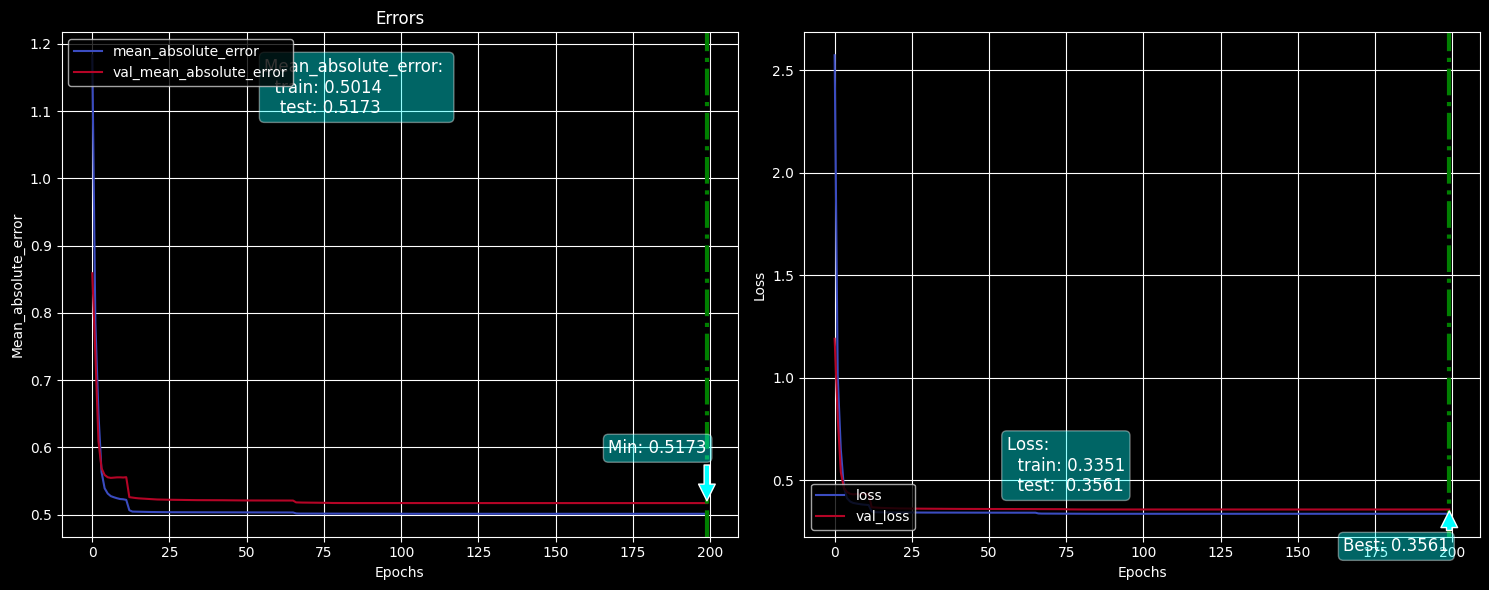

In [ ]:
loss_df=pd.DataFrame(history.history)
fn_plot_tf_hist(loss_df)

In [ ]:
y_pred_train=model(X_train).numpy()
y_pred_test=model(X_test).numpy()

train_df=pd.DataFrame({"pred":y_pred_train[:,0],
                       "y_train":y_train,
                       "y_true":y_true})

display(train_df.head())

test_df=pd.DataFrame({"pred":y_pred_test[:,0],
                       "y_test":y_test,
                       "y_true":y_true_test})
test_df.head()

,pred,y_train,y_true
0,8.387723,9.122001,8.201966
1,8.384970,8.598571,8.199547
2,8.382215,9.196872,8.197137
3,8.379461,7.634873,8.194738
4,8.376708,7.914462,8.192349


,pred,y_test,y_true
0,8.387723,8.539487,8.201966
1,8.360187,7.328536,8.178218
2,8.332650,7.193551,8.155420
3,8.305114,7.915680,8.133514
4,8.277576,8.124319,8.112437


In [ ]:
train_df.index.shape

(4192,)

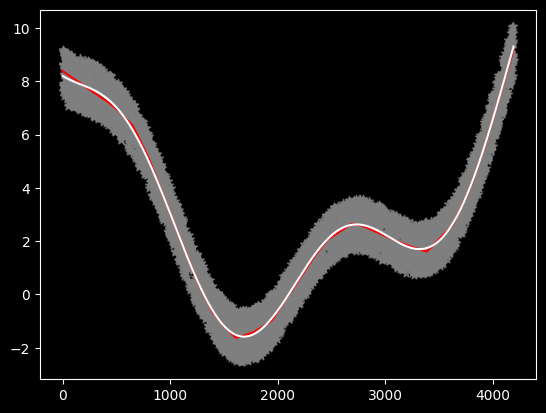

In [ ]:
ax=train_df.pred.plot(c="r",label="Predict")
train_df.y_true.plot(c="w",ax=ax,label="True")

plt.scatter(x=train_df.index,y=y_train,marker="*",c="Grey",alpha=0.8)

## **Predictions**

In [ ]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
y_pred=prob_model(X_train).numpy()
print(f"Accuracy:{accuracy_score(y_train,y_pred.argmax(axis=1)):.4f}")
print(classification_report(y_train,y_pred.argmax(axis=1)))

Accuracy:0.8981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1608
           1       0.93      0.94      0.93      4698
           2       0.86      0.87      0.87      5489
           3       0.86      0.82      0.84      2722

    accuracy                           0.90     14517
   macro avg       0.91      0.91      0.91     14517
weighted avg       0.90      0.90      0.90     14517



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

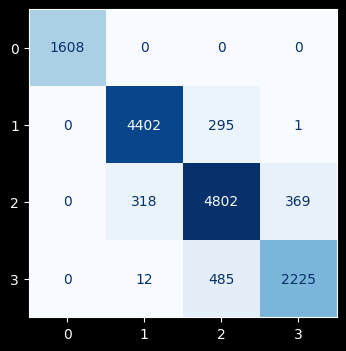

In [ ]:
fn_plot_confusion_matrix(y_train,y_pred.argmax(axis=1),class_names)

In [ ]:
y_pred=prob_model(X_test).numpy()
print(f"Accuracy:{accuracy_score(y_test,y_pred.argmax(axis=1)):.4f}")
print(classification_report(y_test,y_pred.argmax(axis=1)))

Accuracy:0.9167
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.92      0.86      0.89        14
           2       0.89      1.00      0.94         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



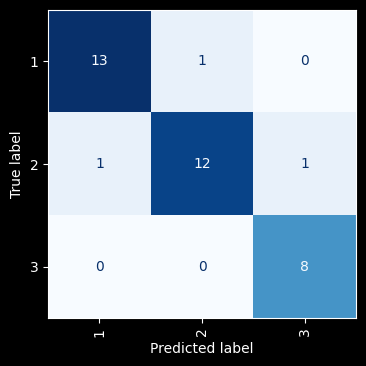

In [ ]:
fn_plot_confusion_matrix(y_test,y_pred.argmax(axis=1),class_names)

In [ ]:
loss_hist={}
# y_train=y_train.reshape(-1,1)
param={}
param["h_dim"]=[X_train.shape[1],5,5,4,3,y_train.shape[1]]##No. of neurons in hidden layer
y_train.shape

IndexError: tuple index out of range

In [ ]:
np.exp(710)

C:\Users\dai\AppData\Local\Temp\ipykernel_18148\574927170.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(710)


np.float64(inf)

In [ ]:
def fn_softmax(z):
    exp_score=np.exp(z-np.max(z))
    return exp_score/np.sum(exp_score,axis=1,keepdims=True)

In [ ]:
sm=fn_softmax(np.asarray([[-1,0,1.0],[-10,0,8]]))
sm.sum(axis=1)

array([1., 1.])

In [ ]:
def fn_activ(z):
    return np.tanh(z)
def fn_active_prime(z):
    return 1.0 - np.tanh(z)**2

In [ ]:
def predict(model,X):
    W1=model["W1"]
    W2=model["W2"]
    b1=model["b1"]
    b2=model["b2"]

    #Forward propogation
    z1=X.dot(W1) + b1 #Aggregation
    a1=fn_activ(z1) # Activation

    z2=a1.dot(W2) + b2 #Aggregation
    a2=fn_softmax(z2) # Activation

    return a2>=0.5

In [ ]:
def calculate_loss(model, X , y):
    W1=model["W1"]
    W2=model["W2"]
    b1=model["b1"]
    b2=model["b2"]

    #Forward propogation
    z1=X.dot(W1) + b1 #Aggregation
    a1=fn_activ(z1) # Activation

    z2=a1.dot(W2) + b2 #Aggregation
    a2=fn_sigmoid(z2) # Activation

    data_loss=-(y * np.log(a2) + (1-y)* np.log(1-a2)).sum()

    return data_loss/X.shape[0]

In [ ]:
def built_model(param,X_tr,y_tr,X_ts,y_ts,alpha,n_epoch):
    m=X_tr.shape[0]
    nn_output_dim=y.shape[1]
    W1=rng.random((param["h_dim"][0],param["h_dim"][1]))/np.sqrt(param["h_dim"][0])
    W2=rng.random((param["h_dim"][1],param["h_dim"][2]))/np.sqrt(param["h_dim"][1])
    W3=rng.random((param["h_dim"][2],param["h_dim"][3]))/np.sqrt(param["h_dim"][2])
    W4=rng.random((param["h_dim"][3],param["h_dim"][4]))/np.sqrt(param["h_dim"][3])
    W5=rng.random((param["h_dim"][4],param["h_dim"][5]))/np.sqrt(param["h_dim"][4])
    
    b1=np.zeros((1,param["h_dim"][1]))
    b2=np.zeros((1,param["h_dim"][2]))
    b3=np.zeros((1,param["h_dim"][3]))
    b4=np.zeros((1,param["h_dim"][4]))
    b5=np.zeros((1,param["h_dim"][5]))
    
    
    loss,epoch=[], []

    for i in range(n_epoch):

        #Forward propogation
        z1=X_tr.dot(W1) + b1 #Aggregation
        a1=fn_activ(z1) # Activation

        z2=a1.dot(W2) + b2 #Aggregation
        a2=fn_softmax(z2) # Activation

        #Back Propogation

        #Layer2
        dz2=a2-y
        assert (z2.shape == dz2.shape), f"Shape z2: {z2.shape},{dz2.shape}"

        dW2=(a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f"Shape w2: {W2.shape},{dW2.shape}"

        db2=np.sum(dz2,axis=0,keepdims=True)
        assert (b2.shape == db2.shape), f"Shape b2: {b2.shape},{db2.shape}"

        da1=dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f"Shape a2: {a2.shape},{da1.shape}"

        #Layer1
        dz1=da1 * fn_active_prime(z1)
        assert (z1.shape == dz1.shape), f"Shape z1: {z1.shape},{dz1.shape}"

        dW1=(X_tr.T).dot(dz1)
        assert (W1.shape == dW1.shape), f"Shape W1: {W1.shape},{dW1.shape}"

        db1=np.sum(dz1,axis=0,keepdims=True)
        assert (b1.shape == db1.shape), f"Shape b1: {b1.shape},{db1.shape}"

        W1 = W1 - alpha * dW1/m
        b1 = b1 - alpha * db1/m
        W2 = W2 - alpha * dW2/m
        b2 = b2 - alpha * db2/m

        model={"W1":W1,"W2":W2,"b1":b1,"b2":b2}

        if(i%100 == 0):
            curr_loss = calculate_loss(model,X,y)
            epoch.append(i)
            loss.append(curr_loss)
            print(f"epoch - {i} : Loss - {curr_loss}")
    
            loss_hist["epoch"] = epoch
            loss_hist["loss"] = loss
    return model


In [ ]:
model=built_model(param,X_train,y_train,X_test,y_test,alpha=ALPHA,n_epoch=EPOCHS)
model

NameError: name 'built_model' is not defined

In [ ]:
loss_df=pd.DataFrame(loss_hist)
loss_df

NameError: name 'loss_hist' is not defined

In [ ]:
loss_df.plot(x="epoch",y="loss")


In [ ]:
def fn_plot_decision_boundary(X: np.ndarray, y :np.ndarray, model, pred_func):
    """
    Plots the decision boundary for a classification model.

    Args:
        X: The input features (numpy array, expected shape (m, 2)).
        y: The true labels (numpy array).
        model: A dictionary containing the trained weights and biases (W1, W2, B1, B2).
        pred_func: A function that takes the model and a feature array (XX) 
                   and returns the class predictions (0 or 1).
    """
    # NOTE: The weights retrieval 'model.we' was incorrect and is removed.
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 0.5 # Increased padding for better visualization
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # NOTE: The line 'XX = np.hstack((XX, np.ones((XX.shape[0], 1))))' is removed.
    # The bias term is handled internally by the neural network's forward propagation 
    # (z1 = X.dot(w1) + b1), so the input data (XX) shouldn't be augmented with a column of ones.

    # Make predictions for the entire mesh grid
    # The pred_func should handle the forward pass through the model and return binary predictions.
    y_p = pred_func(model, XX) 
    
    # Reshape predictions to match the original mesh grid dimensions (xx.shape)
    # y_p is expected to be a 1D array of predictions (0 or 1).
    Z = np.array(y_p).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    # Use 'coolwarm' or 'bwr' for binary classification. 'Purples' is usually for single-class density.
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm) 
    
    # Scatter plot of the actual data points, colored by their true class labels
    # Use 'y' for the color (true label) instead of X[:, 2] (which might not exist or be the label).
    ax.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=40, edgecolor='k', cmap=plt.cm.coolwarm) 
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('Feature 1')  
    ax.set_ylabel('Feature 2') 
    
    # Display the final plot
    plt.show()


In [44]:
fn_plot_decision_boundary(X, y, model, predict)

NameError: name 'fn_plot_decision_boundary' is not defined